===== 연 습 ====

In [8]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs
import time

In [13]:
# 동의종료 청원_동의종료 전체 청원
def get_response(page_no):

    url = f'https://petitions.assembly.go.kr/api/petits?pageIndex={page_no}&recordCountPerPage=8&sort=AGRE_END_DE-&searchCondition=sj&searchKeyword=&petitRealmCode=&sttusCode=PETIT_FORMATN,CMIT_FRWRD,PETIT_END&resultCode=BFE_OTHBC_WTHDRAW,PROGRS_WTHDRAW,PETIT_UNACPT,APPRVL_END_DSUSE,ETC_TRNSF&notInColumn=RESULT_CODE&beginDate=20200201&endDate=20230123&ageCd='
#     response = requests.get(url)
    
#     return response.text
    return url

In [27]:
#  pd.read_json(url) 사용하니 DataFrame table 값이 나옴
#  column 수가 99개로 필요한 데이터 컬럼만 선별하여 뽑을 필요가 있음
#  ['rowNum', 'petitId', 'petitSj', 'petitCn', 'petitRealmNm', 'jrsdCmitNm',
# 'agreBeginDe', 'agreEndDe', 'agreCo']
table = pd.read_json(get_response(2))
table = table[['rowNum', 'petitId', 'petitSj', 'petitCn', 'petitRealmNm', 'jrsdCmitNm', 
              'agreBeginDe', 'agreEndDe', 'agreCo']]
table

,rowNum,petitId,petitSj,petitCn,petitRealmNm,jrsdCmitNm,agreBeginDe,agreEndDe,agreCo
0,9,E1F040C2B4C06C4DE054B49691C1987F,"경찰공무원이 스토킹범죄, 음란물유포죄 등으로 벌금 100만원 이상 선고 받으면 임용...","최근 국가공무원법, 지방공무원법에 스토킹범죄, 정통망법 제74호 제1항 제2호 및 ...",행정/지방자치,행정안전위원회,2022-12-20 15:19:20,2023-01-19 23:59:59,3350
1,10,E1F0304972BE2D8EE054B49691C1987F,공정과 상식에 맞는 감사보다는 조직 보호만 일삼는 경기도교육청 경교피아 척결을 위한...,지난 이태원 핼러윈 축제 참사에서도 보았듯이 국가 기관의 잘못으로 나뿐만 아니라 모...,교육,교육위원회,2022-12-20 15:20:06,2023-01-19 23:59:59,145
2,11,E1F04BA30EC86887E054B49691C1987F,심각해지는 노인 빈곤 문제 해결을 위한 고령자고용촉진법 개정에 관한 청원,고용상 연령차별금지 및 고령자고용촉진에 관한 법률은 고령자가 그 능력에 맞는 직업을...,인권/성평등/노동,환경노동위원회,2022-12-14 17:42:57,2023-01-13 23:59:59,166
3,12,EB0E1E2D98A61CA1E054B49691C1987F,대리수술 근절을 위한 엄격한 의료법 개정에 관한 청원,"1.개정된 의료법으로는 아래와 같은 이유로, 대리수술 피해를 예방하기에는 너무나 부...",보건의료,보건복지위원회,2022-12-13 15:18:30,2023-01-12 23:59:59,557
4,13,E28F70BC6DFE50F1E054B49691C1987F,오산 메이커교육센터 폐관 결정 취소에 관한 청원,오산시민들에게 드리는 호소문\r\n오산시민 여러분! \r\n우리 시민들을 위해 오산...,교육,교육위원회,2022-12-09 17:42:13,2023-01-08 23:59:59,483
5,14,E28F70BC6DEA50F1E054B49691C1987F,월곶판교 복선전철 건설사업 6공구에 관한 청원,월곶~판교 복선전철 건설사업 6공구 기본설계가R300에서 R400으로 변경 되...,국토/해양/교통,국토교통위원회,2022-12-07 17:27:21,2023-01-06 23:59:59,126
6,15,E1F03765BF836C41E054B49691C1987F,중증 정신장애인과 발달장애인의 활동지원사에 직계가족이 포함될 수 있도록 하는 장애인...,안녕하세요.\r\n\r\n발달장애 아동의 부모입니다.\r\n\r\n지난 22년 1월...,보건의료,보건복지위원회,2022-12-07 17:27:41,2023-01-06 23:59:59,25545
7,16,E1F02AAF2F032A62E054B49691C1987F,전자상거래 등에서의 소비자보호에 관한 법률에 관한 청원,많은 게임사들은 현금·상품권 등 현금성 재화로 게임머니 또는 그에 상응하는 재화성 ...,소비자/공정거래,정무위원회,2022-12-02 17:29:25,2023-01-01 23:59:59,151


In [24]:
# requests로 해당 url에 있는 json 내용을 response 변수에 넣는다
# response.json()을 통해 json 내용을 보기 쉽게 리스트 형식으로 만든다.
response = requests.get(get_response(1))
df_json = response.json()
df_json[0]

{'rowNum': 1,
 'searchCondition': '',
 'searchKeyword': '',
 'pageIndex': 1,
 'pageUnit': 10,
 'firstIndex': 1,
 'lastIndex': 1,
 'recordCountPerPage': 10,
 'tableName': '',
 'prefix': '',
 'sort': '',
 'creatIp': None,
 'creatId': None,
 'creatDt': '2022-12-21 10:33:25',
 'updtIp': None,
 'updtId': None,
 'updtDt': '2023-01-23 00:01:00',
 'petitTmprSn': None,
 'hashtagCn': '',
 'referUrlCn': '',
 'beginDate': '',
 'endDate': '',
 'ageCd': None,
 'petitId': 'EB0E1E2D98CD1CA1E054B49691C1987F',
 'mberId': 'mose0074',
 'mberIdList': None,
 'memberId': None,
 'petrNm': '윤**',
 'petitSj': '원주민 전매 허용을 위한 공공주택 특별법 개정 요청에 관한 청원',
 'petitObjet': None,
 'petitReason': None,
 'petitCn': '공공주택 특별법의 현물보상의 근거(제40조의10,토지등의 수용등) 조항으로 인한 사적\xa0 재산권의 침해가 있어 원주민 전매제한을 허용하는 입법 수정안을 요청 드립니다. \r\n\r\n제물포역 북측 도심 공공주택복합사업 현장의 주민대표회의에서 요청 드립니다. \r\n\r\n3080+공공주택복합사업은 주택공급대책의 방안으로 투기수요를 제한하는 공공주택특별법을 근거로 신설되었으나, 단기간에 개정된 특별법으로 사적 재산권의 침해가 있어 법령의 수정보완을 요청드립니다. \r\n\r\n2021년 2.4대책의 일환으로 신설된 3080사업의 취지는\r\n절차의 간소화

In [6]:
petit_id = 'EB0E1E2D98CD1CA1E054B49691C1987F'
url_detail = f'https://petitions.assembly.go.kr/api/petits/{petit_id}?petitId={petit_id}&sttusCode='
print(url_detail)

https://petitions.assembly.go.kr/api/petits/EB0E1E2D98CD1CA1E054B49691C1987F?petitId=EB0E1E2D98CD1CA1E054B49691C1987F&sttusCode=


In [25]:

response = requests.get(url_detail)
temp = response.json()
temp = temp['petitObjet']
temp


' 공공주택특별법 제40조의10, 4항의 원주민 소유권등기후 매매로 장기간 사적 재산권피해로부터 보호'

<Response [200]>

,rowNum,searchCondition,searchKeyword,pageIndex,pageUnit,firstIndex,lastIndex,recordCountPerPage,tableName,prefix,...,billId,currCommittee,currCommitteeId,committeeDt,billProcessDc,comments,likmsAt,trnsfInstt,trnsfRm,addDays
0,1,,,1,10,1,1,10,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2,,,1,10,1,1,10,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,3,,,1,10,1,1,10,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,4,,,1,10,1,1,10,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,5,,,1,10,1,1,10,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,6,,,1,10,1,1,10,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6,7,,,1,10,1,1,10,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
7,8,,,1,10,1,1,10,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


===== 본 문 ====

1. 국민청원 목록 데이터 수집하기

In [193]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs
import time
from datetime import datetime
from tqdm import trange
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import numpy as np
import random
tqdm.pandas()

In [2]:
def today_date():
    today_date = datetime.today().strftime("%Y%m%d")
    return today_date

In [3]:
def get_url(page_no):
    url = f'https://petitions.assembly.go.kr/api/petits?pageIndex={page_no}&recordCountPerPage=8&sort=AGRE_END_DE-&searchCondition=sj&searchKeyword=&petitRealmCode=&sttusCode=PETIT_FORMATN,CMIT_FRWRD,PETIT_END&resultCode=BFE_OTHBC_WTHDRAW,PROGRS_WTHDRAW,PETIT_UNACPT,APPRVL_END_DSUSE,ETC_TRNSF&notInColumn=RESULT_CODE&beginDate=20191112&endDate={today_date()}&ageCd='
    return url

In [4]:
def get_purpose(petit_id):
    
    detail_url = f'https://petitions.assembly.go.kr/api/petits/{petit_id}?petitId={petit_id}&sttusCode='
    response = requests.get(detail_url)
    temp = response.json()['petitObjet']
    time.sleep(0.1)
    
    return temp

In [5]:
def get_all_page():
    
    temp_list = []
    page_no = 1
    try:
        while True:
            temp_table = pd.read_json(get_url(page_no))
            temp_list.append(temp_table)
            if temp_table.shape[0] < 8:
                break
            page_no += 1
            time.sleep(0.1)

        df_temp = pd.concat(temp_list).reset_index(drop=True)
        df_temp = df_temp.dropna(axis=1)
        df = df_temp.copy()

        df['petitObjet'] = df['petitId'].progress_map(get_purpose).copy()
        df = df[['rowNum', 'petitSj', 'petitObjet', 'petitCn', 'petitRealmNm', 'resultCodeNm', 
                  'agreBeginDe', 'agreEndDe', 'agreCo']]
        df.columns = ['번호', '청원제목', '청원취지', '청원내용', '청원분야', '청원결과', '청원시작일', '청원종료일', 
                '동의수']
        
        file_name = f'국민청원수집_{today_date()}'
        df.to_csv(file_name, index=False)
        df = pd.read_csv(file_name)   
        
        return df
    
    except Exception as e:
        print(f'오류발생 {e}')

In [9]:
df = get_all_page()

  0%|          | 0/630 [00:00<?, ?it/s]

In [10]:
df

,번호,청원제목,청원취지,청원내용,청원분야,청원결과,청원시작일,청원종료일,동의수
0,1,원주민 전매 허용을 위한 공공주택 특별법 개정 요청에 관한 청원,"공공주택특별법 제40조의10, 4항의 원주민 소유권등기후 매매로 장기간 사적 재산...","공공주택 특별법의 현물보상의 근거(제40조의10,토지등의 수용등) 조항으로 인한 사...",국토/해양/교통,동의만료폐기,2022-12-23 10:24:53,2023-01-22 23:59:59,682
1,2,길고양이 학대법 강화 요청에 관한 청원,생명의 가벼운 무게란 없습니다\r\n처벌이 약할수록 반사회적행동을 하는 이들이\r\...,지난 2월 동탄에서\r\n28세 남성이 100여마리의 길고양이를\r\n입에 담기 어...,농업/임업/수산업/축산업,동의만료폐기,2022-12-21 18:04:27,2023-01-20 23:59:59,563
2,3,일시적 2주택자 종부세 특례 기간 3년로 변경 요청에 관한 청원,일시적 2주택자 종부세 특례 기간이 2년으로 규정되어 아래와 같이 문제점이 있습니다...,일시적 2주택자 종부세 특례 기간을 양도세 비과세 특례기간과 동일하게 3년으로 변경...,재정/세제/금융/예산,동의만료폐기,2022-12-20 15:17:51,2023-01-19 23:59:59,121
3,4,기상직 면접 미흡 결정 기준과 미흡 상세 이유 통보 요청에 관한 청원,공무원 면접 미흡 사유가 구체적으로 어떻게 되는지 그리고 왜 비공개인지 알고싶습니다.,우선 제가 응시한 기상직 7급의 경우 2017년 이후로 5년 만에 시험이 재개가 된...,재난/안전/환경,동의만료폐기,2022-12-20 15:17:17,2023-01-19 23:59:59,121
4,5,외국인 선거권 폐지 요청에 관한 청원,국내 정치를 좌우하는 외국인 투표로 좌우되는 문제점,이번에 \n경기도지사 선거에서 표 차이는 8913표 차이였습니다\n현재 \n지방선거...,행정/지방자치,동의만료폐기,2022-12-20 15:20:45,2023-01-19 23:59:59,2618
...,...,...,...,...,...,...,...,...,...
625,626,모병제 도입에 관한 청원,"사회적 악습과 복합적 사회갈등을 조장하는 징병제를 폐지하고, 안보전문성을 강화할 수...",# 징병제가 야기한 사회적 폐단\n(1).\t징병제가 사회 갈등에 미치는 영향분석\...,외교/통일/국방/안보,동의만료폐기,2020-01-28 16:47:59,2020-02-29 23:59:59,717
626,627,디지털성범죄 유형 및 신고포상금에 대한 법 개정의견에 관한 청원,디지털성범죄의 심각성과 특수성을 법에 반영하기 위함.,2019년 11월 26일 개정되어 2020년 5월 25일 시행 예정인 아동청소년의 ...,저출산/고령화/아동/청소년/가족,동의만료폐기,2020-01-28 16:50:02,2020-02-29 23:59:59,949
627,628,"인터넷에서 지울 수 없는, 물리적 성범죄보다 극심한 2차 3차 피해를 야기하는 디지...",수많은 디지털 성범죄 피해자들이 자살하고 있습니다. 하루가 멀다 하고 실시간 수많은...,"걸리지만 않으면, 걸려도 벌금 내면 그만이란 생각에 몰카 범죄자 2명 중 1명은 재...",수사/법무/사법제도,동의만료폐기,2020-01-21 16:34:44,2020-02-22 23:59:59,3772
628,629,오토바이에 대한 자동차 전용도로 통행금지 해제에 관한 청원,OECD 회원국 중 왜 우리나라만 오토바이 고속도로 진입을 허가하지 않는가. 왜 O...,1. 오토바이는 도로교통법상 자동차에 속하지만 도로 통행은 제한받고 있다.\n2. ...,국토/해양/교통,동의만료폐기,2020-01-14 15:09:09,2020-02-15 23:59:59,24822


In [136]:
df['청원결과'].unique()

array(['동의만료폐기', '위원회심사', '본회의불부의', '위원회접수후철회', '대안반영폐기', '임기만료폐기'],
      dtype=object)

In [32]:
df_temp = df[df['청원결과'] == '동의만료폐기']
nagr_num = df_temp.shape[0]
total_num = df.shape[0]

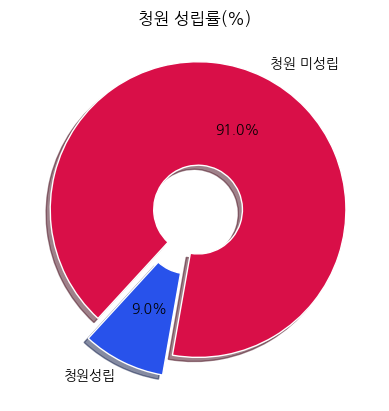

In [56]:
# 청원 성립률
ratio = [(1-nagr_num/total_num)*100, nagr_num/total_num*100]

labels = ['청원성립', '청원 미성립']
explode = [0.1, 0.05]
colors = [ '#2852eb', '#d90f48']
wedgeprops={'width': 0.7, 'edgecolor': 'w'}

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, 
        shadow=True, explode=explode, wedgeprops=wedgeprops)
plt.title('청원 성립률(%)')
plt.show()

In [60]:
df["청원분야"].unique()

array(['국토/해양/교통', '농업/임업/수산업/축산업', '재정/세제/금융/예산', '재난/안전/환경', '행정/지방자치',
       '수사/법무/사법제도', '보건의료', '교육', '인권/성평등/노동', '소비자/공정거래',
       '저출산/고령화/아동/청소년/가족', '과학기술/정보통신', '문화/체육/관광/언론', '외교/통일/국방/안보',
       '산업/통상', '복지/보훈', '정치/선거/국회운영', '기타'], dtype=object)

In [184]:
df_field = pd.DataFrame()

for field in df["청원분야"].unique():
    
    num = df[df['청원분야'] == field].shape[0]
    df_field[field] = [num, round(num / df.shape[0] * 100, 1),
                      df[(df['청원분야'] == field) & (df['청원결과'] != '동의만료폐기')].shape[0],
                      round(df[(df['청원분야'] == field) & (df['청원결과'] != '동의만료폐기')]
                            .shape[0]/num*100, 1)] 
    
df_field = df_field.T
df_field.columns = ['청원수', '비율(%)', '동의수', '동의성공률(%)']
df_field = df_field.sort_values(by='청원수', ascending=False)
df_field

,청원수,비율(%),동의수,동의성공률(%)
수사/법무/사법제도,110.0,17.5,16.0,14.5
보건의료,88.0,14.0,8.0,9.1
국토/해양/교통,52.0,8.3,0.0,0.0
행정/지방자치,50.0,7.9,4.0,8.0
정치/선거/국회운영,42.0,6.7,4.0,9.5
교육,36.0,5.7,2.0,5.6
재정/세제/금융/예산,35.0,5.6,1.0,2.9
재난/안전/환경,34.0,5.4,2.0,5.9
문화/체육/관광/언론,24.0,3.8,1.0,4.2
산업/통상,23.0,3.7,3.0,13.0


In [209]:
# 막대 그래프 얻는 함수
def get_bar_graph(df, subject, graph_title):

    df = df.sort_values(by=subject, ascending=True)
    y = np.arange(df.shape[0])
    years = df.index
    values = [ a for a in df.loc[:, subject]]

    plt.barh(y, values, align='edge', edgecolor='#eee',
             linewidth=1, tick_label=years)
    plt.title(graph_title)

    return plt.show()

In [215]:
# 파이 차트 얻는 함수
def get_pie_chart(df, subject, graph_title):
    
    df = df.sort_values(by=subject, ascending=True)
    df = df[df[subject] > 0]
    ratio =  [ a for a in df.loc[:, subject]]
    labels = df.index

    explode = [0.1 for _ in df[subject] ]
#     colors =  [ "#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in df_field.index]
    colors = [ '#2852eb', '#eb6628', '#c78426', '#bfb21d', '#f20a99', '#f216dc','#9413eb', '#4b07de','#4b02f5', '#0f41f5','#07acf2', '#11fae3','#05f76a', '#52f705', '#d3f705', '#f79e05','#eb6628', '#d90f48',]
    wedgeprops={'width': 0.7, 'edgecolor': 'w'}
    plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, 
            shadow=True, explode=explode, wedgeprops=wedgeprops)
    plt.title(graph_title)
    
    return plt.show()

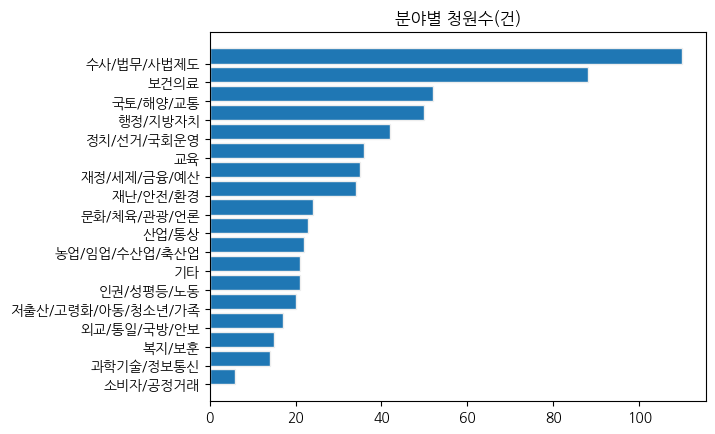

In [210]:
get_bar_graph(df_field, '청원수', '분야별 청원수(건)')

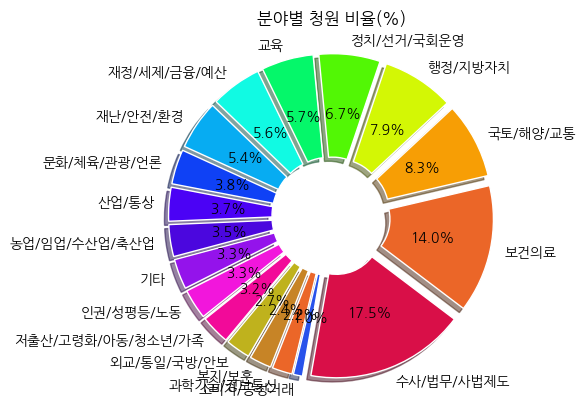

In [212]:
get_pie_chart(df_field, '비율(%)', '분야별 청원 비율(%)')

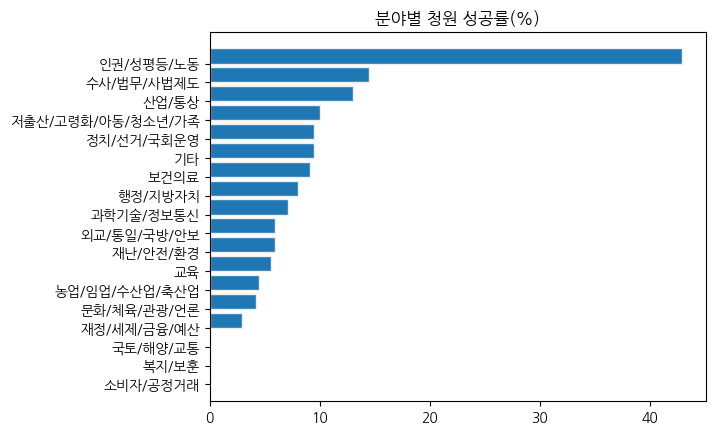

In [213]:
get_bar_graph(df_field, '동의성공률(%)', '분야별 청원 성공률(%)')

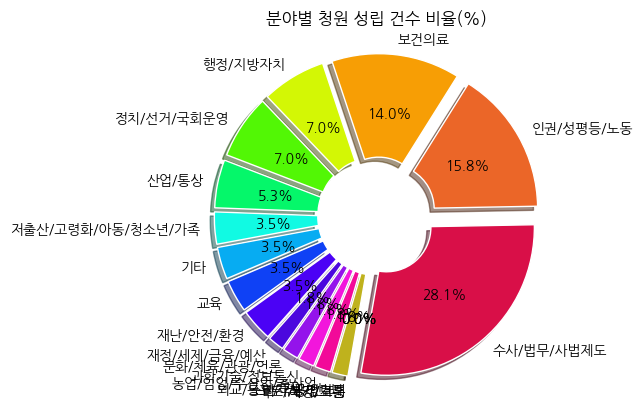

In [190]:
get_pie_chart(df_field, '동의수', '분야별 청원 성립 건수 비율(%)')